<p style="font-family:ComicSansMS; font-size: 30px; color: magenta"> Image Processing in Python</p>

<p style="font-family:ComicSansMS; font-size: 20px; color: orange"> Image processing involves analyzing and modifying digital images using computer algorithms.</p>

> 1. Image Resizing
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.resize(): Resizes the image to new dimensions.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.INTER_CUBIC: Provides high-quality enlargement.</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.INTER_AREA: Works best for downscaling.</<p>

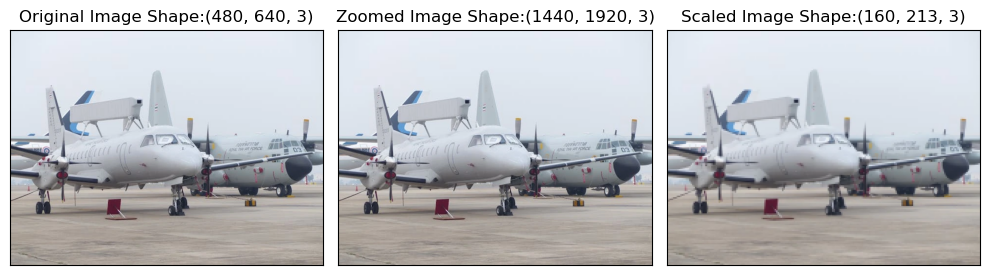

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
scale_factor_1 = 3.0  
scale_factor_2 = 1/3.0
height, width = image_rgb.shape[:2]
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

zoomed_image = cv2.resize(src =image_rgb, 
                          dsize=(new_width, new_height), 
                          interpolation=cv2.INTER_CUBIC)
                          
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)
scaled_image = cv2.resize(src= image_rgb, 
                          dsize =(new_width1, new_height1), 
                          interpolation=cv2.INTER_AREA)

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

> 2. Image Rotation
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.getRotationMatrix2D() : generates the transformation matrix.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.warpAffine() : applies the rotation.</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">A positive angle rotates the image clockwise; a negative angle rotates it counterclockwise.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">The scale factor adjusts the image size.</<p>

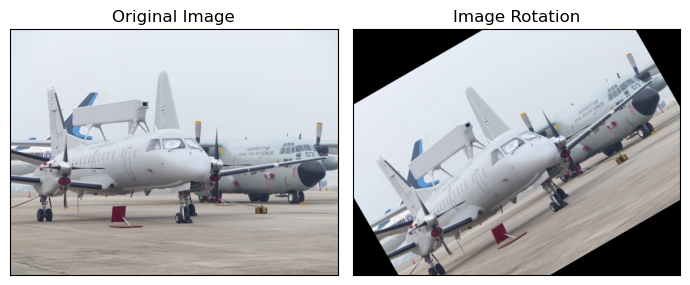

In [2]:
img = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()


> 3. Image Translation
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Image Translation is the process of moving an image from one position to another within a specified frame of reference.</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.warpAffine() shifts the image based on translation values.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">tx, ty define the movement along the x and y axes.</<p>


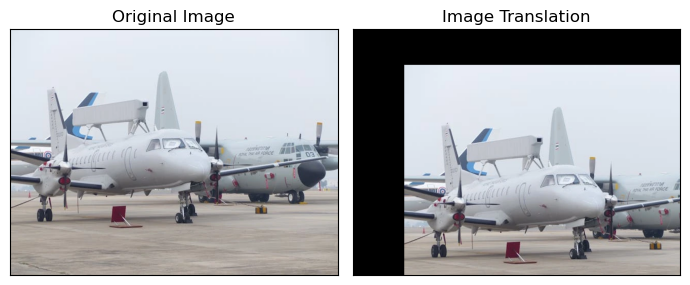

In [3]:
img = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

tx, ty = 100, 70
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(translated_image), axs[1].set_title('Image Translation')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()


> 4. Image Shearing
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Image Shearing is a geometric transformation that distorts or skews an image along one or both axes.</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">shear_x, shear_y control the degree of skewing.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.warpAffine() applies the transformation.</<p>


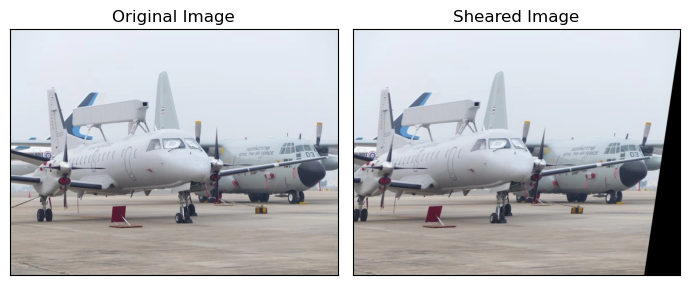

In [4]:
img = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

shearX, shearY = -0.15, 0
transformation_matrix = np.array([[1, shearX, 0], [0, 1, shearY]], dtype=np.float32)
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(sheared_image), axs[1].set_title('Sheared Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()



> 5. Image Normalization
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Image Normalization scales pixel values to a specific range to enhance image processing tasks. Here:</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.normalize(): Normalizes pixel values.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.NORM_MINMAX: Scales values between 0 and 1.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.merge(): Combines separately normalized RGB channels.</<p>


[[0.87058824 0.87058824 0.87058824 ... 0.8627451  0.8627451  0.8627451 ]
 [0.87058824 0.87058824 0.87058824 ... 0.8627451  0.8627451  0.8627451 ]
 [0.87058824 0.87058824 0.87058824 ... 0.8627451  0.8627451  0.8627451 ]
 ...
 [0.63529412 0.63529412 0.63529412 ... 0.64313725 0.65098039 0.65882353]
 [0.63137255 0.63137255 0.63137255 ... 0.63529412 0.64313725 0.64705882]
 [0.62745098 0.62745098 0.62745098 ... 0.62352941 0.63137255 0.63529412]]


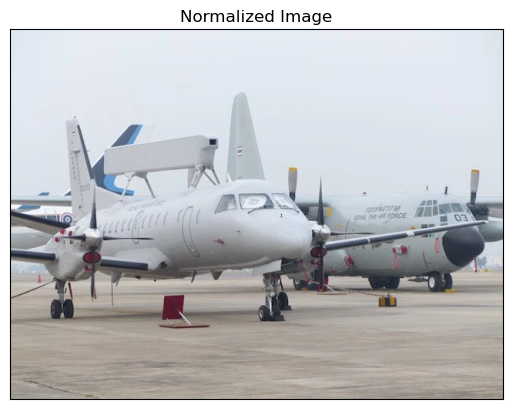

In [5]:
img = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(image_rgb)

b_normalized = cv2.normalize(b.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
g_normalized = cv2.normalize(g.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
r_normalized = cv2.normalize(r.astype('float'), None, 0, 1, cv2.NORM_MINMAX)

normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
print(normalized_image[:, :, 0])

plt.imshow(normalized_image)
plt.xticks([]), 
plt.yticks([]), 
plt.title('Normalized Image')
plt.show()


> 6. Edge detection of Image
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Edge detection is used to find sharp edges withing image to find different objects and boundaries within a image. Canny Edge Detection is a popular edge detection method. Here:</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.GaussianBlur(): Removes noise through Gaussian smoothing.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.Sobel(): Computes the gradient of the image.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.Canny(): Applies non-maximum suppression and hysteresis thresholding to detect edges.</<p>


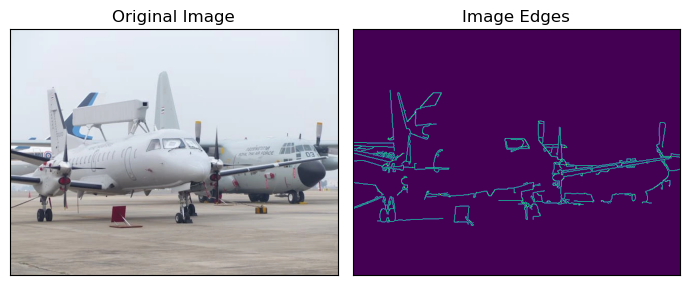

In [6]:
img = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(image_rgb, 100, 700)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(edges), axs[1].set_title('Image Edges')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()


> 7. Image Blurring
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Image Blurring reduces image detail by averaging pixel values. Here:</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.GaussianBlur(): Smooths using a Gaussian kernel.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.medianBlur(): Replaces pixels with the median value in a neighborhood.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.bilateralFilter(): Preserves edges while blurring.</<p>


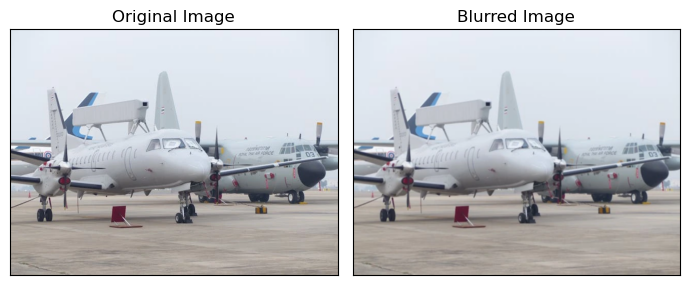

In [7]:
image = cv2.imread('../../data/pexels-saab-340.webp')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(image, (3, 3), 0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(blurred_rgb), axs[1].set_title('Blurred Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()



> 8. Morphological Image Processing
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Morphological Image Processing involves techniques that process the structure or shape of objects in an image. It focuses on operations like dilation, erosion, opening and closing which modify the image’s geometric features.</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.dilate(): Expands object boundaries.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.erode(): Shrinks object boundaries.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.morphologyEx() with cv2.MORPH_OPEN: Removes small noise.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.morphologyEx() with cv2.MORPH_CLOSE: Fills small holes.</<p>


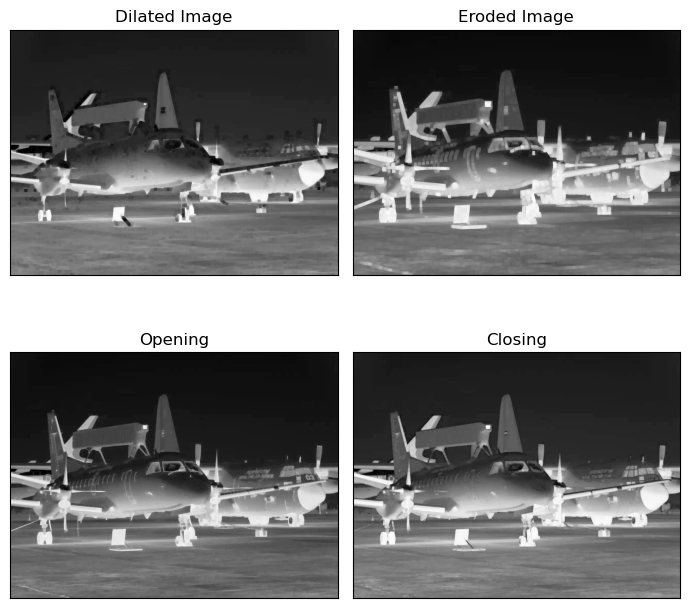

In [8]:
image = cv2.imread('../../data/pexels-saab-340.webp')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(image_gray, kernel, iterations=2)
eroded = cv2.erode(image_gray, kernel, iterations=2)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(dilated, cmap='Greys'), axs[0, 0].set_title('Dilated Image')
axs[0, 1].imshow(eroded, cmap='Greys'), axs[0, 1].set_title('Eroded Image')
axs[1, 0].imshow(opening, cmap='Greys'), axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='Greys'), axs[1, 1].set_title('Closing')

for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()


> 7. Image Blurring
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">Image Blurring reduces image detail by averaging pixel values. Here:</<p> 
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.GaussianBlur(): Smooths using a Gaussian kernel.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.medianBlur(): Replaces pixels with the median value in a neighborhood.</<p>
* <p style="font-family:ComicSansMS; font-size: 20px; color: orange">cv2.bilateralFilter(): Preserves edges while blurring.</<p>
